768
614 154 768

For k =  3
Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        96
         1.0       0.65      0.57      0.61        58

   micro avg       0.72      0.72      0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

Confusion matrix 
[[78 18]
 [25 33]]
No of correct predictions
111.0
For k =  5
Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79        96
         1.0       0.65      0.60      0.62        58

   micro avg       0.73      0.73      0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.72      0.73      0.73       154

Confusion matrix 
[[77 19]
 [23 35]]
No of correct predictions
112.0
For k =  7
Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.77    

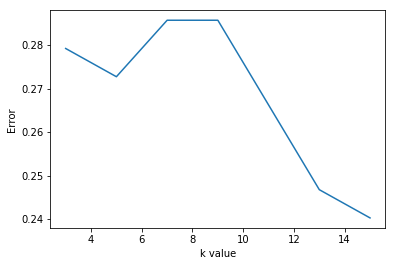

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler

knn = np.arange(3,17,2)
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)
data = dataset.values
print(len(data))
train, test = data[:614], data[614:]
print(len(train),len(test), len(data))

X=data[:,0:8]
Y=data[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)  

distance_matrix = euclidean_distances(X_test, X_train)

print()
y_pred = []
err1 = []
for k in knn:
    y_pred=[]
    for i in range(len(X_test)):
        class0 = 0
        class1 = 0
        distances = np.sort(distance_matrix[i,:], kind='quicksort')
        k_nearest = distances[:k]
        for j in k_nearest:
            temp = y_train[np.where(distance_matrix[i,:]==j)]
            if(temp==0):
                class0 = class0 + 1
            else:
                class1 = class1 + 1
        if(class0>class1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    err1.append(1-accuracy_score(y_test,y_pred))
    print("For k = ", k)
    print("Classification report")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix ")
    print(confusion_matrix(y_test, y_pred))
    print("No of correct predictions")
    print(accuracy_score(y_test, y_pred)*len(X_test))
plt.plot(knn, err1)
plt.xlabel("k value")
plt.ylabel("Error")
plt.show()